On the digits dataset, plot the cross-validation score of a SVC estimator with an linear kernel as a function of parameter C (use a logarithmic grid of points, from 1 to 10). Remember that C = 1/lambda (where lambda is the regularization parameter), higher the C, model overfits more

In [9]:
%matplotlib inline
import numpy as np
from sklearn import cross_validation, datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

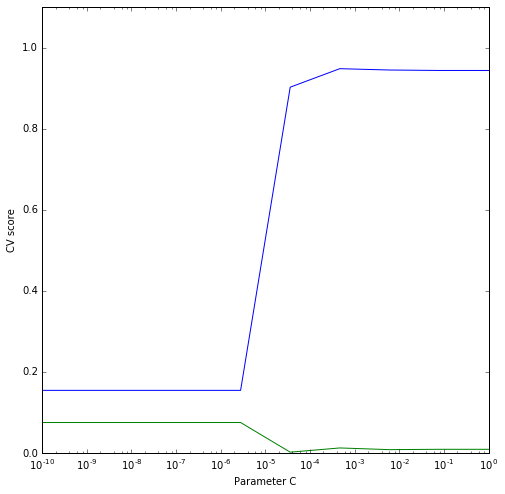

In [11]:
import matplotlib.pyplot as plt

def computeScore(C):
    svc.C = C
    score = cross_validation.cross_val_score(svc, X, y, n_jobs=1)
    return np.mean(score), np.std(score)

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.semilogx(C_s, map(computeScore, C_s))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()


Feels like the best fit comes at around 1e-3

Let's use Grid Search as suggested in http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html to select the best C for the model

In [13]:
from sklearn.grid_search import GridSearchCV

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X[:1000], y[:1000])        

print clf.best_score_                                  

print clf.best_estimator_.C                            

# Prediction performance on test set is not as good as on train set
print clf.score(X[1000:], y[1000:])      

0.925
0.00774263682681
0.943538268507


as expected, best C is 7.7e-3